# Pre-processing

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from datetime import datetime
from datetime import date

In [2]:
df = pd.read_csv("../Data/pharmacy_tx.csv")
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00


In [3]:
def get_doy(d):
    return d.dayofyear

In [4]:
df['day'] = pd.to_datetime(df.tx_date).apply(get_doy)
df = df.drop(columns = ['tx_date'])
df.head()

,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,day
0,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,2
1,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,2
2,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,2
3,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,2
4,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,2


<AxesSubplot:xlabel='day'>

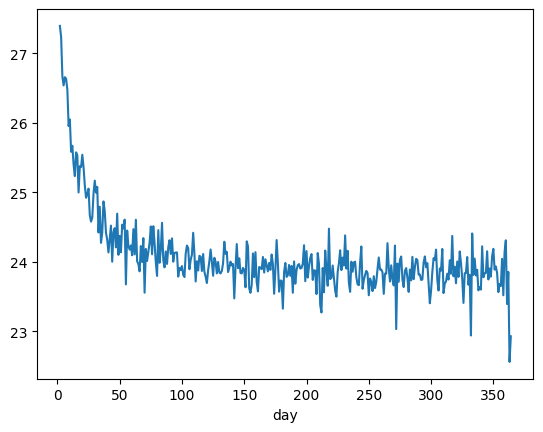

In [5]:
df.groupby(by = 'day')['patient_pay'].mean().plot()

In [6]:
df = df[df['rejected']==False]

In [7]:
df = df.drop(columns = ['pharmacy', 'group', 'pcn', 'rejected'])
df['bin '] = df['bin'].map(str)
df.head()

,diagnosis,drug,bin,patient_pay,day,bin
0,G99.93,branded tanoclolol,725700,13.39,2,725700
1,U60.52,branded oxasoted,664344,7.02,2,664344
2,Q85.91,branded cupitelol,725700,13.39,2,725700
3,U60.52,generic oxasoted,571569,10.84,2,571569
4,N55.01,branded mamate,664344,47.00,2,664344


In [8]:
df['drug_type'] = df['drug'].apply(lambda x: x.split(' ')[0])
df['drug'] = df['drug'].apply(lambda x: x.split(' ')[1])
df.head()

,diagnosis,drug,bin,patient_pay,day,bin,drug_type
0,G99.93,tanoclolol,725700,13.39,2,725700,branded
1,U60.52,oxasoted,664344,7.02,2,664344,branded
2,Q85.91,cupitelol,725700,13.39,2,725700,branded
3,U60.52,oxasoted,571569,10.84,2,571569,generic
4,N55.01,mamate,664344,47.00,2,664344,branded


In [9]:
df= df[['day', 'drug_type', 'drug', 'diagnosis', 'bin', 'patient_pay']]

In [10]:
X = df.copy()

In [11]:
y = X.iloc[:,-1]
X = X.drop(columns = ['patient_pay'])

In [12]:
X['bin'] = X['bin'].map(str)

In [13]:
X = pd.get_dummies(X, drop_first = True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [15]:
X_train.head()

,day,drug_type_generic,drug_bovirol,drug_brede,drug_choxestamenium,drug_cibroniudosin,drug_cicrochoric,drug_colade,drug_colifunene,drug_cupitelol,...,bin_539437,bin_571569,bin_664344,bin_691847,bin_718350,bin_725700,bin_756120,bin_757349,bin_956971,bin_96934
5197337,146,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643154,20,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11999316,317,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2548632,75,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13471059,351,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
lr_model = LinearRegression(fit_intercept=True)

In [ ]:
#lr_model.fit(X_train,y_train)
#This kills my kernel or just doesn't terminate -- seems that the dataset is too big :(

How much time does linear regression take on subsets of the data? Note: our dataset has size ~10**7

Execution time using:  100  data points:  0.017345084000226052  seconds
Execution time using:  200  data points:  0.02604045799944288  seconds
Execution time using:  400  data points:  0.02829954099979659  seconds
Execution time using:  800  data points:  0.03660775000025751  seconds
Execution time using:  1600  data points:  0.040964000000712986  seconds
Execution time using:  3200  data points:  0.059636500000124215  seconds
Execution time using:  6400  data points:  0.09529533400018408  seconds
Execution time using:  12800  data points:  0.13216695800019806  seconds
Execution time using:  100000  data points:  0.8402681669995218  seconds
Execution time using:  1000000  data points:  12.253057834000174  seconds


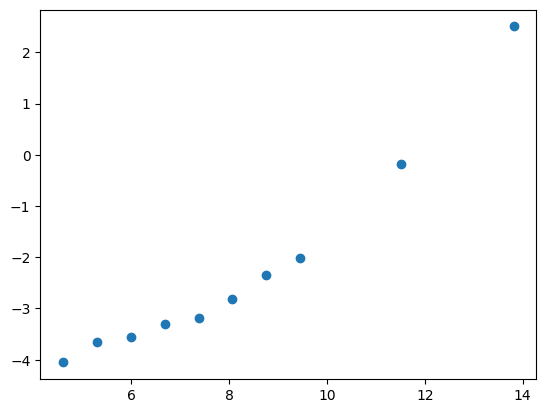

In [46]:
lr_model_2 = LinearRegression(fit_intercept=True)
import timeit

# Define the function you want to measure
def lin_reg(X,y):
    lr_model_2.fit(X,y)
    pass

a = [100,200,400,800,1600, 3200, 6400, 12800, 10**5, 10**6]
b  =[]
for s in a:
    # Measure the execution time of the function
    execution_time = timeit.timeit(lambda: lin_reg(X_train[:s], y_train[:s]), number=1)
    b.append(execution_time)

    # Print the execution time
    print("Execution time using: ", s, " data points: ", execution_time, " seconds")
plt.scatter(np.log(a),np.log(b))

In [54]:
#Let's try fitting a quadratic to this and extrapolating to len(X_train)
coefs = np.polyfit(np.log(a), np.log(b), 2)
p = np.poly1d(coefs)

In [53]:
#Then it should take this number of seconds for the whole dataset X_train
np.exp(p(np.log(len(X_train))))

346.3823981799245

Hmm, that's only ~6 minutes. I've let it run for way longer. Probably a memory issue then.

 Let's just average together coefficients from linear regressions of subsets of (X_train, y_train)

In [69]:
n_samples = 20
coefs = np.zeros((n_samples, X_train.shape[1]))
intercepts = np.zeros((n_samples, 1))
for i in range(n_samples):
    X_ignore, X_tt, y_ignore, y_tt = train_test_split(X_train, y_train, test_size = 0.1, random_state = 40)
    lr_model.fit(X_tt, y_tt)
    coefs[i] = lr_model.coef_
    intercepts[i] = lr_model.intercept_
avg_coefs = np.mean(coefs, axis=0)
avg_ints = np.mean(intercepts, axis=0)
final_lr_model = LinearRegression(fit_intercept = True)
final_lr_model.coef_ = avg_coefs
final_lr_model.intercept_ = avg_ints
lr_preds = final_lr_model.predict(X_test)

/Users/williamhardt/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [70]:
np.sqrt(mean_squared_error(y_test,lr_preds))

18.516376019926376

What are the coefficients in this linear regression?

In [71]:
d =dict(zip(X.columns, final_lr_model.coef_))
d = sorted(d.items(), key = lambda k: k[1])
d

[('diagnosis_Q60.75', -339.1508747517052),
 ('diagnosis_U75.95', -19.457954571791092),
 ('diagnosis_B45.03', -17.10574093741011),
 ('diagnosis_H89.42', -15.493763039295777),
 ('diagnosis_Y08.66', -13.367731266958918),
 ('bin_322463', -11.108464848210243),
 ('diagnosis_K78.87', -7.454120320215853),
 ('drug_oxasoted', -7.437804200968489),
 ('drug_foxivelule', -7.324928852021972),
 ('diagnosis_W21.26', -7.226153226812232),
 ('drug_tovane', -6.752877012971429),
 ('drug_gorol', -6.635890220489772),
 ('drug_glycontazepelol', -6.634898738281448),
 ('drug_tanoclolol', -6.484641834953763),
 ('drug_rulfalol', -6.288675916977738),
 ('drug_colade', -6.223767399902285),
 ('drug_glulune', -6.111036882184678),
 ('drug_suvinicuvir', -6.056263749364664),
 ('drug_tafistitrisin', -5.890380792254431),
 ('drug_prazinib', -5.496895977077726),
 ('drug_brede', -5.468456152981942),
 ('drug_bovirol', -5.211648932778279),
 ('drug_lalol', -3.7719247630185615),
 ('drug_type_generic', -3.7318208752455946),
 ('diagn

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
X_train.loc[X_train.index[:5]]

,day,drug_type_generic,drug_bovirol,drug_brede,drug_choxestamenium,drug_cibroniudosin,drug_cicrochoric,drug_colade,drug_colifunene,drug_cupitelol,...,bin_539437,bin_571569,bin_664344,bin_691847,bin_718350,bin_725700,bin_756120,bin_757349,bin_956971,bin_96934
5197337,146,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643154,20,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11999316,317,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2548632,75,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13471059,351,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
def run_model_samples(model, X_train, y_train, X_test, y_test, n_samples, sample_prop):
    preds = np.zeros((n_samples, len(y_test)))
    for i in range(n_samples):
        #Get random subset
        I = np.random.choice(X_train.index, size = int(sample_prop*len(X_train)), replace = False)

        #Get sub-datasets
        X_tt, y_tt = X_train.loc[I], y_train.loc[I]
        
        # Fit Model
        model.fit(X_tt,y_tt)
    
        # Get Prediction for each sample
        preds[i] = np.array(list(map(relu,model.predict(X_test))))
    
    #Average predictions
    avg_preds = np.mean(preds, axis = 0)
    
    #Calculate KPIs of average predictions
    rmse = np.sqrt(mean_squared_error(y_test, avg_preds))
    print(f'RMSE : {rmse}')
    rmsle = mean_squared_log_error(y_test, avg_preds, squared = False)
    print(f'RMLSE: {rmsle}')

In [40]:
def relu(x):
    return max(0,x)

In [38]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    rmsle = mean_squared_log_error(y_test, y_preds)
    print(f'RMLSE: {rmsle}')

In [56]:
trees = [10,50,100]

for n in trees:
    rfr_model = RandomForestRegressor(n_estimators=n)
    run_model_samples(rfr_model, X_train, y_train, X_test, y_test, 10, 0.1)

RMSE : 15.652256118679052
RMLSE: 0.3432286794310811
RMSE : 15.656991513648718
RMLSE: 0.34302011363041734
RMSE : 15.635791618219661
RMLSE: 0.3429155187041391


In [54]:
rfr_model = RandomForestRegressor(n_estimators=10)
run_model_samples(rfr_model, X_train, y_train, X_test, y_test, 1, 0.01)

RMSE : 18.283569616613867
RMLSE: 0.3856605510858391


In [57]:
run_model_samples(lr_model, X_train, y_train, X_test, y_test, 10, 0.1)

RMSE : 18.510904855527272
RMLSE: 0.552942596719217


# Examining Linear Regression Residuals

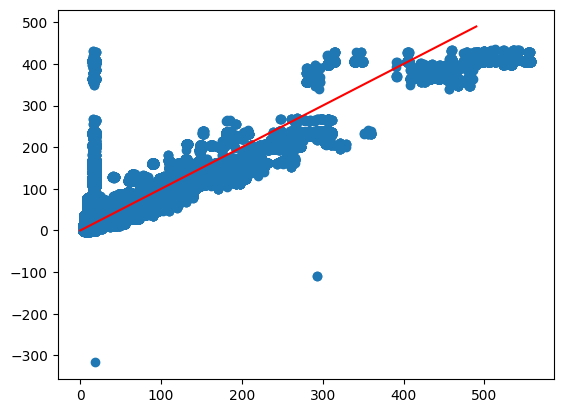

In [79]:
plt.scatter(y_test, lr_preds)
plt.plot(np.arange(0,500,10), np.arange(0,500,10), color = 'red')

In [107]:
df_preds = df.loc[X_test.index].copy()
df_preds['pred_pay'] = lr_preds

In [108]:
df_preds[abs(df_preds['patient_pay']-df_preds['pred_pay'])>200]

,day,drug_type,drug,diagnosis,bin,patient_pay,pred_pay
5502879,157,branded,pheromycin,C14.36,322463,16.47,356.122955
11873129,314,branded,monemodiase,U75.95,664344,18.89,405.017828
2717788,79,branded,prefluflomycin,H86.54,664344,18.89,228.263884
8678566,235,branded,prefluflomycin,I91.91,322463,16.47,227.503995
13474999,351,branded,monemodiase,U75.95,322463,16.47,397.091008
...,...,...,...,...,...,...,...
7346945,202,branded,monemodiase,B45.03,664344,18.89,407.711148
12758943,336,branded,monemodiase,U75.95,322463,16.29,397.136691
6866169,191,branded,prefluflomycin,I91.91,322463,16.47,227.638001
4037782,115,branded,prefluflomycin,H86.54,322463,16.47,220.340108


In [109]:
pred_err = df_preds['pred_pay'] - df_preds['patient_pay']
df_preds = df_preds.drop(columns = ['patient_pay', 'pred_pay'])
df_preds = pd.get_dummies(df_preds, drop_first = True)

In [110]:
lr_model.fit(df_preds, pred_err)

LinearRegression()

In [111]:
d =dict(zip(df_preds.columns, lr_model.coef_))
d = sorted(d.items(), key = lambda k: k[1])
d

[('diagnosis_Q60.75', -379.5996611736809),
 ('diagnosis_H89.42', -49.21720233090598),
 ('diagnosis_X00.63', -30.612840241322612),
 ('diagnosis_N33.46', -29.69266586935083),
 ('diagnosis_G27.20', -13.547298771784279),
 ('drug_flacelfatastat', -10.464559655026777),
 ('drug_vivafastat', -9.281815477122102),
 ('diagnosis_U75.95', -7.116036302012698),
 ('diagnosis_W21.26', -6.9950066575618415),
 ('diagnosis_B45.03', -6.175040661698877),
 ('drug_lehydrome', -5.075841572098901),
 ('diagnosis_K78.87', -4.632428802409205),
 ('diagnosis_Z66.42', -3.920195435987486),
 ('diagnosis_H86.54', -3.2493031404025783),
 ('diagnosis_Y08.66', -3.0211258808737265),
 ('drug_pheromycin', -2.91222300771285),
 ('diagnosis_X26.32', -2.738526643130995),
 ('diagnosis_Q80.97', -2.704570670678956),
 ('diagnosis_H51.45', -2.6301290929452277),
 ('diagnosis_P77.13', -2.461785495840055),
 ('diagnosis_E49.13', -2.4232887995147223),
 ('diagnosis_G95.10', -2.4055875994131943),
 ('drug_nenizevir', -2.197213227166098),
 ('dia

In [112]:
df_preds

,day,bin,drug_type_generic,drug_bovirol,drug_brede,drug_choxestamenium,drug_cibroniudosin,drug_cicrochoric,drug_colade,drug_colifunene,...,diagnosis_Y11.84,diagnosis_Y51.55,diagnosis_Y97.47,diagnosis_Z04.98,diagnosis_Z20.23,diagnosis_Z25.06,diagnosis_Z34.94,diagnosis_Z66.42,diagnosis_Z95.40,diagnosis_Z98.86
2526655,75,571569,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13162765,344,571569,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10002547,268,664344,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9777107,263,96934,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
603661,19,691847,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12367815,324,691847,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
346542,12,725700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2116353,64,664344,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9218879,251,322463,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
df[df['diagnosis']== 'Q60.75'][df['patient_pay']>100]

/var/folders/6h/7cf12br100q1zq0whpzs2tc00000gn/T/ipykernel_29928/2205770366.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['diagnosis']== 'Q60.75'][df['patient_pay']>100]


,day,drug_type,drug,diagnosis,bin,patient_pay
784135,24,branded,prefluflomycin,Q60.75,664344,292.76
1915293,56,branded,prefluflomycin,Q60.75,664344,292.76
3033044,87,branded,prefluflomycin,Q60.75,664344,292.76
3998841,114,branded,prefluflomycin,Q60.75,664344,292.76
5146690,145,branded,prefluflomycin,Q60.75,664344,292.76
7411756,204,branded,prefluflomycin,Q60.75,664344,292.76
8638328,234,branded,prefluflomycin,Q60.75,664344,292.76
13768314,357,branded,prefluflomycin,Q60.75,664344,292.76


In [125]:
df[df['diagnosis']== 'Q60.75'][df['patient_pay']<100]

/var/folders/6h/7cf12br100q1zq0whpzs2tc00000gn/T/ipykernel_29928/1317481689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['diagnosis']== 'Q60.75'][df['patient_pay']<100]


,day,drug_type,drug,diagnosis,bin,patient_pay
399331,14,branded,pheromycin,Q60.75,322463,16.47
2615941,77,branded,pheromycin,Q60.75,322463,16.47
3722916,107,branded,pheromycin,Q60.75,322463,16.47
5810814,164,branded,pheromycin,Q60.75,322463,16.47
7081758,196,branded,pheromycin,Q60.75,322463,16.47
8148816,224,branded,pheromycin,Q60.75,322463,16.47
9420490,255,branded,pheromycin,Q60.75,322463,16.47
10551785,283,branded,pheromycin,Q60.75,322463,16.47
12028351,317,branded,pheromycin,Q60.75,322463,16.47
12230824,321,generic,cycloxasonol,Q60.75,757349,18.52


<AxesSubplot:>

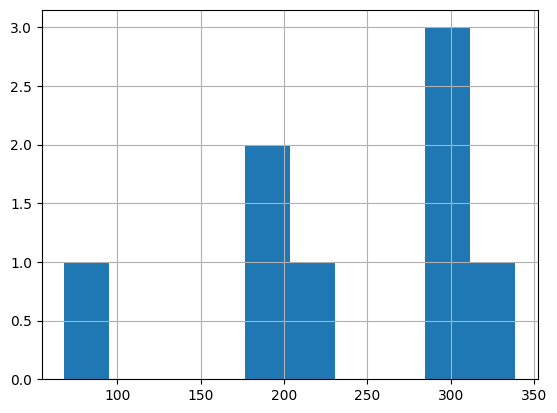

In [122]:
df[df['drug']== 'prefluflomycin'].head(50).groupby(by = 'bin')['patient_pay'].mean().hist()

In [123]:
df[df['drug']== 'prefluflomycin']

,day,drug_type,drug,diagnosis,bin,patient_pay
779,2,branded,prefluflomycin,C14.36,664344,283.94
1541,2,branded,prefluflomycin,I91.91,725700,298.02
2405,2,branded,prefluflomycin,H86.54,718350,299.57
2542,2,branded,prefluflomycin,C14.36,757349,356.16
3399,2,branded,prefluflomycin,C14.36,322463,16.29
...,...,...,...,...,...,...
13909040,364,branded,prefluflomycin,C14.36,725700,296.39
13909133,364,branded,prefluflomycin,I91.91,322463,191.76
13909530,364,branded,prefluflomycin,C14.36,322463,190.94
13909755,364,branded,prefluflomycin,H86.54,664344,18.89
